#### [시도별 전출입 인구수 분석 - Matplotlib]
- DataSet: 1970 ~ 2017년까지 인구이동 수
- 대구의 타지역 이동 인구수 분석
- 전국의 인구 이동수에 대한 분석
- 과정 
  1) 데이터 파일 확인 => 첫번째 줄이 컬럼명이 맞는지 / 불 필요한 컬럼 & 행이 있는지 / 결측치의 정도 확인
  2) 전처리 : 데이터 정리 및 손질
     - 파일 확인 후 체크한 사항 진행
     - 결측치 및 이상치 처리
     - 중복 데이터 처리
     - 형 변환 : 실제 데이터와 타입 일치시키는 것
  3) 데이터 가공 : 분석하고자 하는 데이터 형태로 만들어야함 
     - 행 인덱스 처리 : 멀티인덱스 / 컬럼 => 행 인덱스 / 행 인덱스 초기화
     - 필요한 칼럼 & 행 추출
     - 추가적인 결측치, 이상치, 중복데이터 발생 할 수도 있음 => 처리 
     - 형 변환 : 연속형 => 범주형 or 범주형 => 연속형 
  4) 데이터 분석
     - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
     - 시각화 및 분석 결과 텍스트 요약 정리

- [1] 준비과정 : 모듈, 데이터

In [1]:
# [1-1] 모듈 로딩
import pandas as pd                 # 데이터 분석용 모듈
import matplotlib.pyplot as plt     # 데이터 시각화용 모듈

In [2]:
# [1-2] Data 준비
F_DATA = r"C:\Hwan\Pandas_ex\DAY08\시도별 전출입 인구수.xlsx"

In [3]:
# [1-3] Data ==> DataFrame 형태로 저장
dataDF = pd.read_excel(F_DATA, engine = "openpyxl")

- [2] 데이터 확인 : 행과 컬럼수, 실제 데이터와 컬럼 타입, 결측치 체크

In [4]:
# [2-1] 기본정보 확인 => info(), describe()
# 컬럼의 수, 행의 수, 각각의 컬럼 별 결측치가 아닌 데이터(non-null)의 수, 컬럼별 데이터 타입, 메모리 사용량 등 확인
dataDF.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [5]:
# [2-2] 기본정보 확인 => info(), describe()
# - 수치 데이터 칼럼의 데이터 분호 확인 : 최대값, 최소값, 표준편차, 사분위수, 평균값
# - 범주 데이터 칼럼의 데이터 분호 확인 : 고유값, 가장 많이 나온 값, 가장 많이 나온 값의 빈도수 
dataDF.describe() # 수치 데이터만 나옴
dataDF.describe(include = 'all') # 수치 데이터 아닌 값과 수치 데이터와 함께 나옴 => 범주데이터

# unique : 값의 종류의 개수 
# top: 가장 많이 나온 값, Freq: top의 개수

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,1489,1939,2026,1468,4303,947
freq,1,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [6]:
# [2-3] 실제 Data와 info()에서 확인한 타입 비교 => head()/tail()
dataDF.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [7]:
### 기본 정보 확인 후 결과 작성
# - 1) 불필요한 행 or 칼럼 : 0번 행 삭제
# - 2) 결측치 : "전출지별" 칼럼 => 이전 행 값으로 채우기
# - 3) 이상치 : 행별로 "-" 값이 수치값과 섞여있음 => 0으로 처리 필요 !

- [3] Data 전처리 : 기본 확인에서 파악된 내용 처리
   - 불필요 데이터 삭제 : 0번 행 삭제 
   - 결측치 데이터 처리 : "전출지별" 칼럼 처리
   - 이상치 데이터 처리 : "-"에 대한 처리
   - 데이터 자료형 일치 : 형 변환

In [8]:
# [3-1] 불필요 Data 처리
copyDF = dataDF.drop(index = 0) 
print(f"확인 \n {copyDF.head(3)}")
# 삭제 시킨 인덱스가 그냥 사라짐 => 인덱스를 다시 초기화 시켜줘야함

확인 
   전출지별   전입지별     1970     1971     1972     1973     1974     1975     1976  \
1   전국     전국  4046536  4210164  3687938  4860418  5297969  9011440  6773250   
2  NaN  서울특별시  1742813  1671705  1349333  1831858  2050392  3396662  2756510   
3  NaN  부산광역시   448577   389797   362202   482061   680984   805979   724664   

      1977  ...     2008     2009     2010     2011     2012     2013  \
1  7397623  ...  8808256  8487275  8226594  8127195  7506691  7411784   
2  2893403  ...  2025358  1873188  1733015  1721748  1555281  1520090   
3   785117  ...   514502   519310   519334   508043   461042   478451   

      2014     2015     2016     2017  
1  7629098  7755286  7378430  7154226  
2  1573594  1589431  1515602  1472937  
3   485710   507031   459015   439073  

[3 rows x 50 columns]


In [9]:
# [3-2] 결측치 데이터 처리 => isna(), isnull()
copyDF.isna().sum()

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [10]:
# "1984", "1985", "1986" 칼럼만 추출 후 결측치 데이터 확인
print(copyDF.columns)
copyDF[["1984", "1985", "1986"]]
# copyDF[[1984, 1985,  1986]]

# 3개의 칼럼에서 nan값이 무엇인지 확인하기 
a = copyDF[["1984", "1985", "1986"]].isna()
a[a.sum(axis = 1) > 0] # 3개의 행들을 값을 더했을때 1 이상하면 1개는 True(inda = True는 NaN 값) 값을 가짐 
# ==> 빈 값에 0을 넣어줘야함

Index(['전출지별', '전입지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')


,1984,1985,1986
34,True,True,True
35,True,True,True
36,True,True,True


In [11]:
# 전출지별 결측치 데이터 채우기
copyDF["전출지별"] = copyDF["전출지별"].ffill() # inpalce = True를 줘도 원본이 안 바뀜 => 시리즈만 바뀌는 것

In [12]:
# 수치데이터 결측치 처리 
copyDF[["1984", "1985", "1986"]] = copyDF[["1984", "1985", "1986"]].fillna(0)

In [13]:
# 결측치 처리가 제대로 되었는지 확인
copyDF.isna().sum()

전출지별    0
전입지별    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

In [14]:
# [3-3] 이상치 처리
copyDF.replace("-", 0, inplace = True)

C:\Users\hwans\AppData\Local\Temp\ipykernel_16172\4139128461.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copyDF.replace("-", 0, inplace = True)


In [15]:
# [3-4] 자료형 변환 : 48개 칼럼을 INT로 형 변환
d_ = dict(zip(copyDF.columns[2:].to_list(), ["int"]*(copyDF.shape[1]-2))) # shape를 하면 (행, 열)인데 그 중에서 인덱스 1번 선택
# 뒤에 -2는 0, 1번 칼럼이 전입, 전출이 붙어있어서 -2를 해주는 것
copyDF=copyDF.astype(d_)

In [16]:
print(f'copyDF.dtypes\n {copyDF.dtypes}')

copyDF.dtypes
 전출지별    object
전입지별    object
1970     int32
1971     int32
1972     int32
1973     int32
1974     int32
1975     int32
1976     int32
1977     int32
1978     int32
1979     int32
1980     int32
1981     int32
1982     int32
1983     int32
1984     int32
1985     int32
1986     int32
1987     int32
1988     int32
1989     int32
1990     int32
1991     int32
1992     int32
1993     int32
1994     int32
1995     int32
1996     int32
1997     int32
1998     int32
1999     int32
2000     int32
2001     int32
2002     int32
2003     int32
2004     int32
2005     int32
2006     int32
2007     int32
2008     int32
2009     int32
2010     int32
2011     int32
2012     int32
2013     int32
2014     int32
2015     int32
2016     int32
2017     int32
dtype: object


- [4] 데이터 가공
    - 대구에서 전지역 전입 인구수 분석
    - 전출지별 - "대구광역시"
    - 전입지별 - "대구광역시", "전국" 제외

In [17]:
# 대구광역시 데이터만 추출
mask = (copyDF["전출지별"]=="대구광역시")
cityDF = copyDF[mask]
cityDF

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,대구광역시,서울특별시,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,대구광역시,부산광역시,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,대구광역시,대구광역시,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,대구광역시,인천광역시,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,대구광역시,광주광역시,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
61,대구광역시,대전광역시,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,대구광역시,울산광역시,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,대구광역시,세종특별자치시,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
64,대구광역시,경기도,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [18]:
# - 전출지별 칼럼 삭제
cityDF = cityDF.drop("전출지별", axis = 1)

In [19]:
# 전입지별 칼럼 행 인덱스로 설정
cityDF = cityDF.set_index("전입지별")
cityDF

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,0,0,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
서울특별시,0,0,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
대구광역시,0,0,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,0,0,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,0,0,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827


In [20]:
# 대구광역시, 전국 행 삭제
cityDF = cityDF.drop(["대구광역시", "전국"])
cityDF

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,0,0,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,0,0,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,0,0,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
경기도,0,0,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354
강원도,0,0,0,0,0,0,0,0,0,0,...,1996,1942,2039,1843,1807,1820,1884,1884,1748,1657


In [21]:
# 가공데이터 확인 
print(cityDF.dtypes)

1970    int32
1971    int32
1972    int32
1973    int32
1974    int32
1975    int32
1976    int32
1977    int32
1978    int32
1979    int32
1980    int32
1981    int32
1982    int32
1983    int32
1984    int32
1985    int32
1986    int32
1987    int32
1988    int32
1989    int32
1990    int32
1991    int32
1992    int32
1993    int32
1994    int32
1995    int32
1996    int32
1997    int32
1998    int32
1999    int32
2000    int32
2001    int32
2002    int32
2003    int32
2004    int32
2005    int32
2006    int32
2007    int32
2008    int32
2009    int32
2010    int32
2011    int32
2012    int32
2013    int32
2014    int32
2015    int32
2016    int32
2017    int32
dtype: object


- [5] 히스토그램으로 특정 컬럼 데이터 분포 시각화

In [22]:
# 2000년도 데이터의 분포
cityDF.columns

# 값 기준 정렬  ==> 기본: 오름차순
cityDF["2000"].sort_values() # assending = False => 내림차순

전입지별
세종특별자치시        0
광주광역시        531
제주특별자치도      701
전라남도         971
전라북도        1016
충청북도        1824
강원도         1889
충청남도        2087
인천광역시       2209
대전광역시       2378
울산광역시       3465
부산광역시       5844
경상남도        7977
경기도        13071
서울특별시      16970
경상북도       52556
Name: 2000, dtype: int32

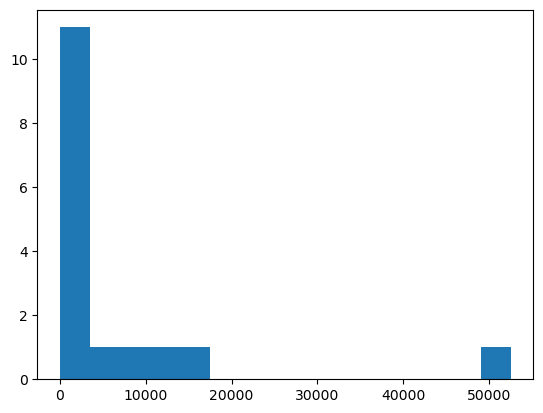

In [30]:
# 2000년도 대구지역에서 타지역으로 이동인구수 분포 
plt.hist(cityDF["2000"], bins= 15) # bins 데이터를 몇개로 나눌건지 
plt.show()

(array([11.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([    0.        ,  3503.73333333,  7007.46666667, 10511.2       ,
        14014.93333333, 17518.66666667, 21022.4       , 24526.13333333,
        28029.86666667, 31533.6       , 35037.33333333, 38541.06666667,
        42044.8       , 45548.53333333, 49052.26666667, 52556.        ]),
 [<matplotlib.patches.Polygon at 0x19dd3e44ac0>])

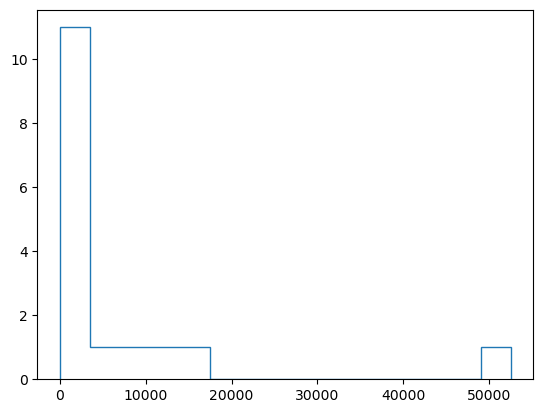

In [24]:
# histtype으로 그래프 형태 변경
plt.hist(cityDF["2000"], bins= 15, histtype= "step") 

(array([11.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([    0.        ,  3663.46666667,  7326.93333333, 10990.4       ,
        14653.86666667, 18317.33333333, 21980.8       , 25644.26666667,
        29307.73333333, 32971.2       , 36634.66666667, 40298.13333333,
        43961.6       , 47625.06666667, 51288.53333333, 54952.        ]),
 [<matplotlib.patches.Polygon at 0x19dd2d2e8e0>])

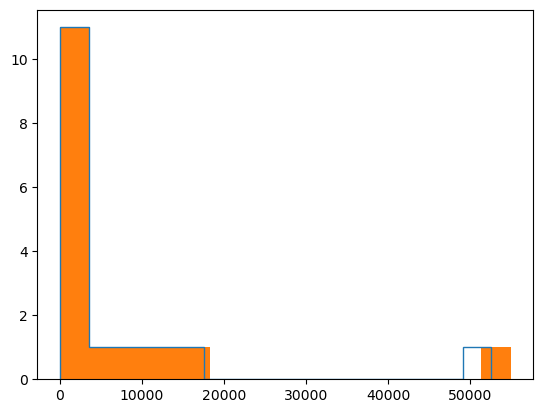

In [25]:
# 2개 표시
plt.hist(cityDF["2000"], bins= 15, histtype= "step") 
plt.hist(cityDF["2002"], bins= 15, histtype= "stepfilled") 

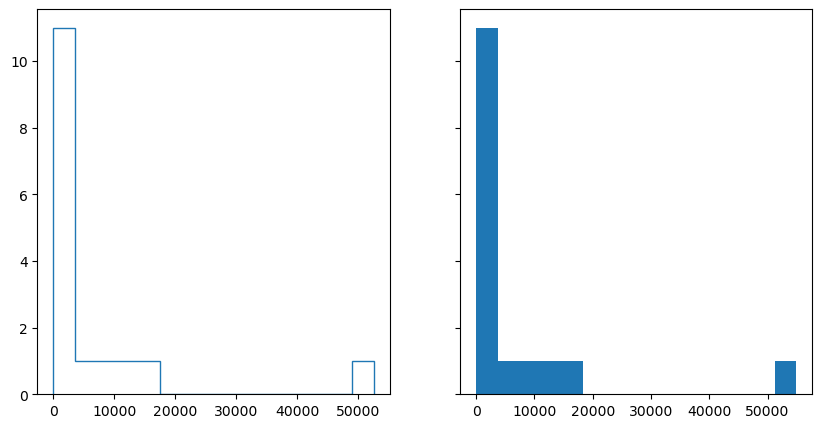

In [26]:
fig = plt.figure(figsize = (10, 5))
ax1, ax2 = fig.subplots(1, 2, sharey = True)
ax1.hist(cityDF["2000"], bins= 15, histtype= "step") 
ax2.hist(cityDF["2002"], bins= 15, histtype= "stepfilled") 
plt.show()

n = > [11.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
bin => [    0.          3503.73333333  7007.46666667 10511.2
 14014.93333333 17518.66666667 21022.4        24526.13333333
 28029.86666667 31533.6        35037.33333333 38541.06666667
 42044.8        45548.53333333 49052.26666667 52556.        ]


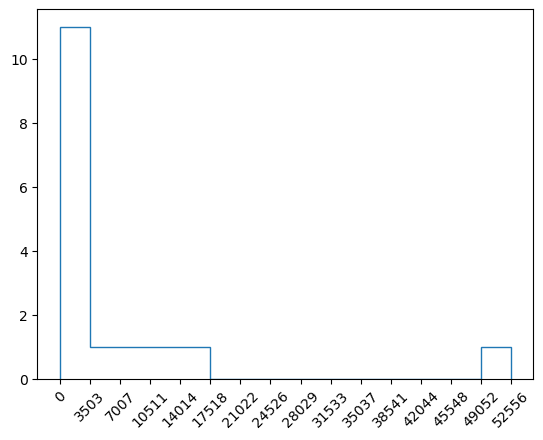

In [27]:
n, bin, obj = plt.hist(cityDF["2000"], bins= 15, histtype= "step") 
print(f"n = > {n}")
print(f"bin => {bin}")
labels = list(map(int, bin.tolist()))
plt.xticks(bin, labels, rotation=45)

plt.show()